In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Telco Customer Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning

In [ ]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Filter and show rows where "TotalCharges" is NaN
data[np.isnan(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
data[data['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

### **It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.**

So, Deleting the rows with missing values as there are only 11 rows and deleting them will not affect the data.

In [ ]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)
data[data['tenure'] == 0].index

Int64Index([], dtype='int64')

#### **Filling the missing values in TotalCharges column with the mean of TotalCharges values.**

In [ ]:
data.fillna(data["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#drop column customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=False)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Data Exploration**

Plot distibution of individual predictors by churn

In [ ]:

color_map = {'Yes': 'pink', 'No': 'blue'}

# Bar Plot: Distribution of Churn
churn_count = data['Churn'].value_counts()
fig_bar = px.bar(x=churn_count.index, y=churn_count.values, title='Distribution of Churn',
                 labels={'x': 'Churn', 'y': 'Count'},
                 color_discrete_map=color_map)
fig_bar.show()

# Pie Chart: Gender Distribution among Churned Customers
gender_churn = data[data['Churn'] == 'Yes']['gender'].value_counts()
fig_pie = px.pie(values=gender_churn.values, names=gender_churn.index, title='Gender Distribution among Churned Customers',
                 color_discrete_map=color_map)
fig_pie.show()

# Count Plot: Internet Service Distribution among Churned Customers
fig_count = px.histogram(data, x='InternetService', color='Churn',
                         title='Internet Service Distribution among Churned Customers',
                         color_discrete_map=color_map)
fig_count.show()

# Box Plot: Monthly Charges by Churn Status
fig_box = px.box(data, x='Churn', y='MonthlyCharges', title='Monthly Charges by Churn Status',
                 labels={'x': 'Churn', 'y': 'Monthly Charges'},
                 color_discrete_map=color_map)
fig_box.show()

# Scatter Plot: Monthly Charges vs. Total Charges
fig_scatter = px.scatter(data, x='MonthlyCharges', y='TotalCharges', color='Churn',
                         title='Monthly Charges vs. Total Charges',
                         labels={'x': 'Monthly Charges', 'y': 'Total Charges'},
                         color_discrete_map=color_map)
fig_scatter.show()


* Total Charges increase as Monthly Charges increase - as expected.

In [ ]:
columns_to_plot = data.drop(columns=['customerID', 'tenure', 'Churn', 'TotalCharges', 'MonthlyCharges']).columns

for i, pred in enumerate(columns_to_plot):
    fig = px.histogram(data, x=pred, color='Churn', barmode='group')
    fig.show()


# The hue='Churn' part adds different colors to the bars
# based on whether the customer churned or not.


In [ ]:
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **Major customers who churned used Electronic Check as Payment Method.**

* **Customers who used Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check were less likely to churn.**

Converting the target variable 'Churn' in a binary numeric variable i.e., Yes=1 ; No = 0

In [ ]:
data['Churn'] = np.where(data.Churn=="Yes", 1, 0)

### **KDE (Kernel Density Estimation) plot**.
It's like drawing a line that shows how common different monthly charge values are for two groups of customers: those who haven't churned (0) and those who have churned (1). The red line is for customers who haven't churned, and the blue line is for customers who have churned. The shade=True part makes the area under the lines shaded.

Text(0.5, 1.0, 'Monthly charges by churn')

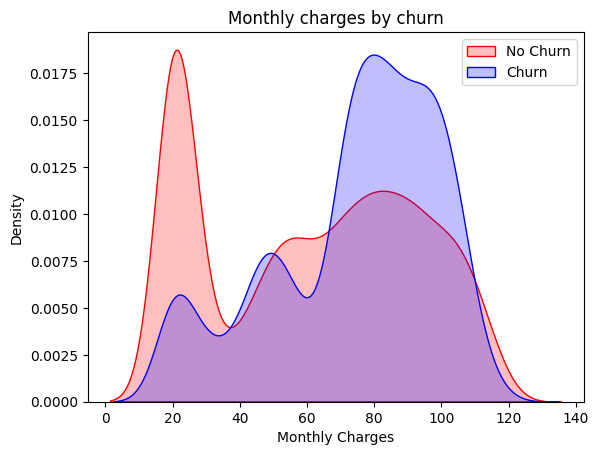

In [ ]:

# MonthlyCharges of customers who haven't churned
no_churn_charges = data.MonthlyCharges[data["Churn"] == 0]

# MonthlyCharges of customers who have churned
churn_charges = data.MonthlyCharges[data["Churn"] == 1]

# Graph to compare the density of Monthly Charges for both groups
graph = sns.kdeplot(no_churn_charges, color="Red", fill=True)
graph = sns.kdeplot(churn_charges, ax=graph, color="Blue", fill=True)

# legend to explain the colors
graph.legend(["No Churn", "Churn"], loc='upper right')

# Labelling axes and title of graph
graph.set_ylabel('Density')
graph.set_xlabel('Monthly Charges')
graph.set_title('Monthly charges by churn')


Text(0.5, 1.0, 'Monthly charges by churn')

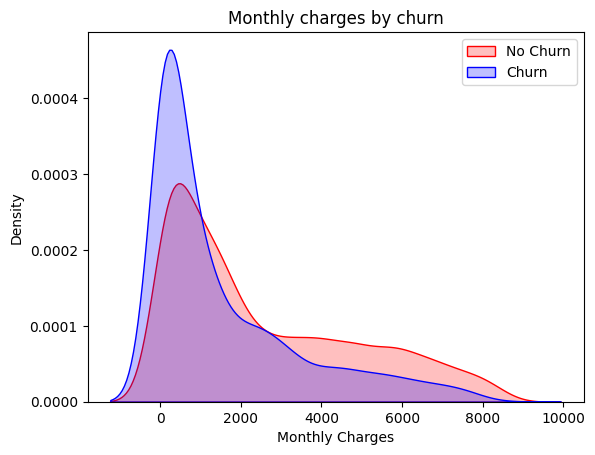

In [ ]:

# TotalCharges of customers who haven't churned
no_churn_charges = data.TotalCharges[data["Churn"] == 0]

# TotalCharges of customers who have churned
churn_charges = data.TotalCharges[data["Churn"] == 1]

# Graph to compare the density of Monthly Charges for both groups
graph = sns.kdeplot(no_churn_charges, color="Red", fill=True)
graph = sns.kdeplot(churn_charges, ax=graph, color="Blue", fill=True)

# legend to explain the colors
graph.legend(["No Churn", "Churn"], loc='upper right')

# Labelling axes and title of graph
graph.set_ylabel('Density')
graph.set_xlabel('Monthly Charges')
graph.set_title('Monthly charges by churn')


Combining 3 parameters i.e. Tenure, Monthly Charges & Total Charges.
Higher Monthly Charge, Lower tenure and Lower Total Charge causes High Churn.

* Convert all the categorical variables into dummy variables

In [ ]:
telco_dummies = pd.get_dummies(data)
telco_dummies.head()

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

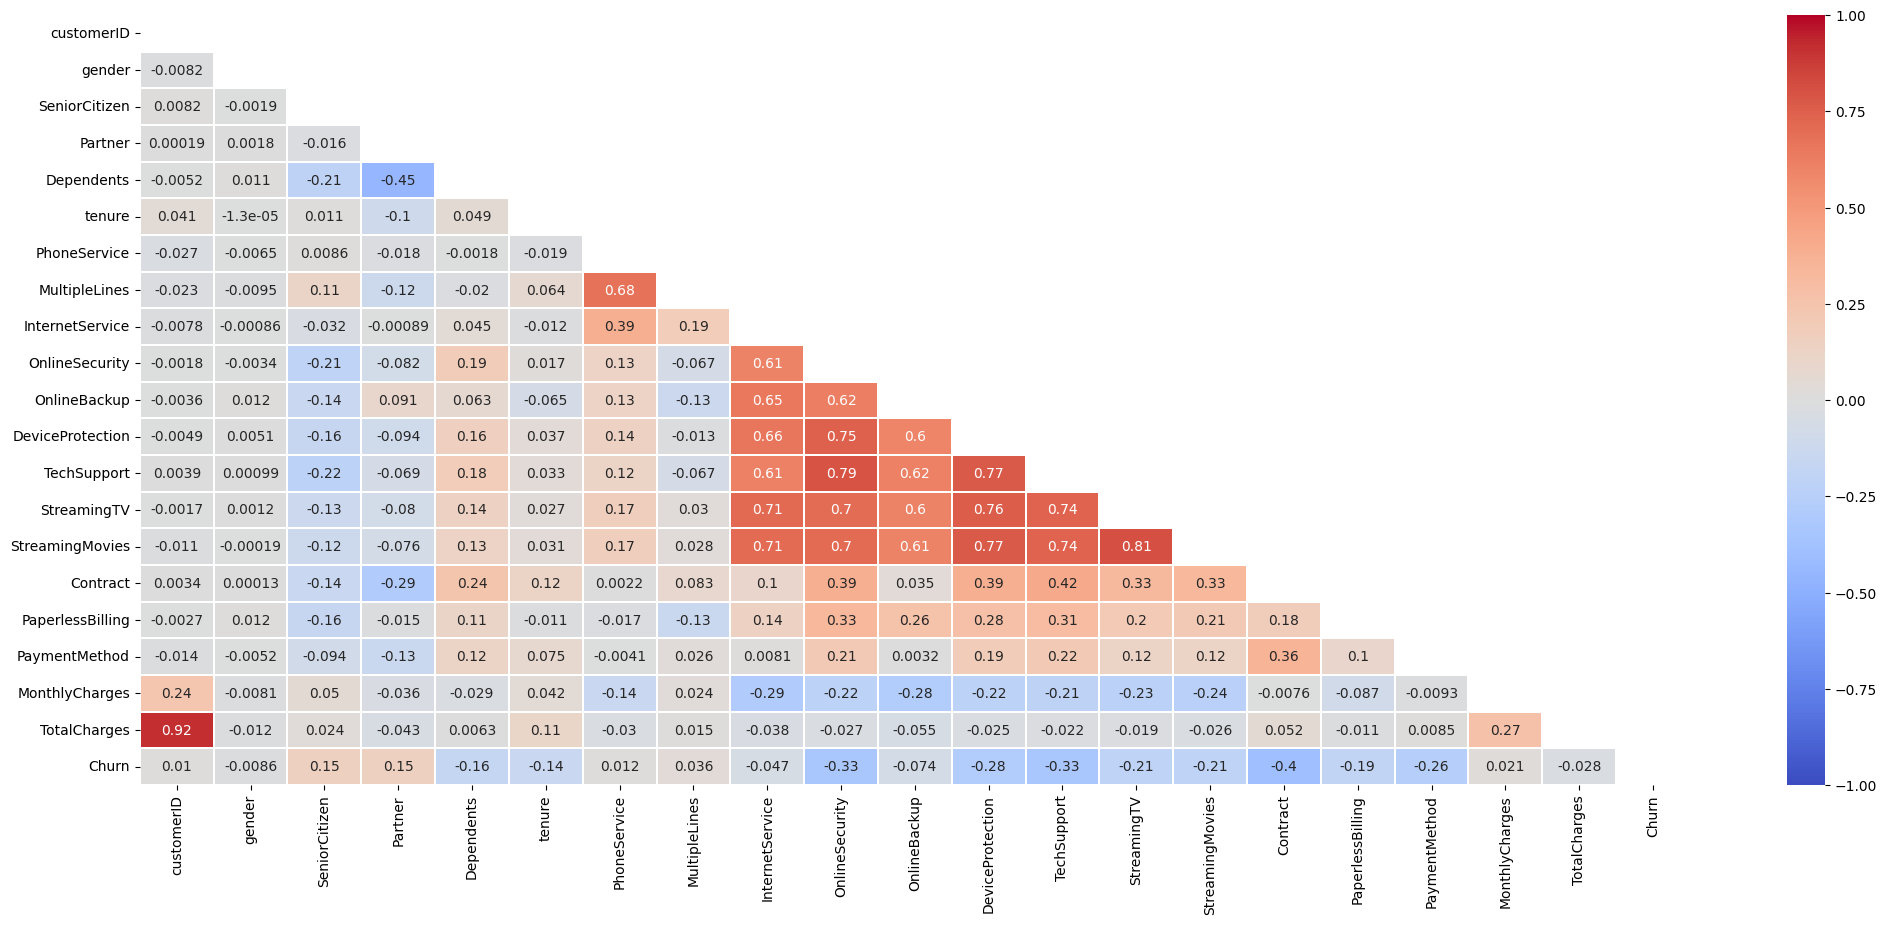

In [ ]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:

# Data Preprocessing
numeric_features = ['tenure', 'MonthlyCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']

# Convert "TotalCharges" to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Split data into features and target
X = data.drop('Churn', axis=1)
y = np.where(data['Churn'] == 'Yes', 1, 0)  # Convert 'Churn' to numerical labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Ada Boost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Evaluate each model
for model_name, model in models.items():
    # Create and evaluate the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit the pipeline to training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print("Model:", model_name)
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_rep)
    print("="*50)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model: Logistic Regression
Accuracy: 0.8121154756270705

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

Model: Random Forest
Accuracy: 0.7856128726928537

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.65      0.45      0.53       574

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113

Model: Gradient Boosting
Accuracy: 0.8064363464268812

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
  

##1 **Logistic Regression:**
It's like drawing a line to separate customers who will churn from those who won't, based on various features.

##2 **Random Forest:**
Imagine a group of decision trees working together. Each tree votes on whether a customer will churn or not, and the majority vote decides the final prediction.

##3 **Gradient Boosting:**
It's like teaching one decision tree after another. Each new tree focuses on fixing the mistakes of the previous ones, leading to a powerful combined prediction.

##4 **Support Vector Machine (SVM):**
It's like finding a plane that best separates the customers who will churn from those who won't, by maximizing the distance between the two groups.

##5 **Decision Tree:**
Imagine a game of 20 questions. Each question splits customers into different groups, helping to predict whether they'll churn or not. A decision tree could ask questions about internet service, device protection, and tenure to predict if a customer is likely to churn.

##6 **K-Nearest Neighbors (KNN):**
It's like asking your neighbors who've stayed the longest. KNN checks the churn status of similar customers (neighbors) and predicts based on their majority.
It can predict churn for a customer by looking at what happened with similar customers in terms of contract type and payment method.

##7 **Ada Boost:**
As a teamwork game where each new model focuses on the mistakes of the previous ones, like boosting each other's performance.
It can analyze how different features like streaming TV and tech support influence churn, improving predictions over time.

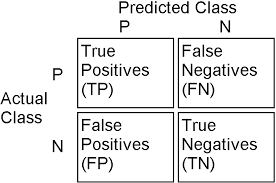

1. actual value: jo k pehle se true hn.


2. predicted value:  jo k predict ki hn.


actual means that user actually churned company or not

predict: model tells that user will churn or not / churned or not

TN  FP

FN  TP


model says that he not lefts and in actual not lefts : TN
model says that he not lefts and in actual lefts : FN: type 2 error

model says that he lefts and in actual not lefts : FP: type 1 error
model says that he lefts and in actual lefts : TP


accuracy: ( TP + TN ) / total

recall: TP / actual yes ( FN + TP )

precision: TP / predicted yes ( TN + FP )


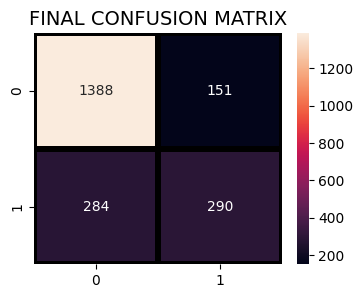

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

1.  **From the confusion matrix we can see that: There are total 1388+151=1539 actual non-churn values and the algorithm predicts 1388 of them as non churn and 151 of them as churn.**
2.  **While there are 284+290=574 actual churn values and the algorithm predicts 284 of them as non churn values and 290 of them as churn values.**


##Overall, the model's performance is better at identifying non-churn (class 0) instances than churn (class 1) instances



# END